In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from scipy.optimize import curve_fit
import matplotlib.patches as mpl_patches

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
Test1 = pd.read_csv('C:/Users/sahil/OneDrive/Desktop/pyreservoir-master/data/welltest/welltest1_constant_rate_drawdown.csv')
q1 = 1000 #STB/D

In [4]:
Test1.head()

,t,p,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0.0,2500.0,NaN,NaN,NaN
1,0.1,2388.3,NaN,NaN,NaN
2,0.2,2381.5,NaN,NaN,NaN
3,0.3,2377.5,NaN,NaN,NaN
4,0.4,2374.7,NaN,NaN,NaN


In [5]:
Test2 = pd.read_csv('C:/Users/sahil/OneDrive/Desktop/pyreservoir-master/data/welltest/welltest2_multi_rate_drawdown.csv')

In [6]:
Test2.head()

,t,p
0,1,2189.3
1,2,2182.5
2,3,2178.5
3,4,2175.7
4,5,2173.5


In [7]:
Test3 = pd.read_csv('C:/Users/sahil/OneDrive/Desktop/pyreservoir-master/data/welltest/welltest3_constant_pressure.csv')


In [8]:
Test3.head()

,t,q
0,1,614.6
1,2,578.4
2,3,559.2
3,4,546.2
4,5,536.6


Text(0, 0.5, 'Rate(STB/D)')

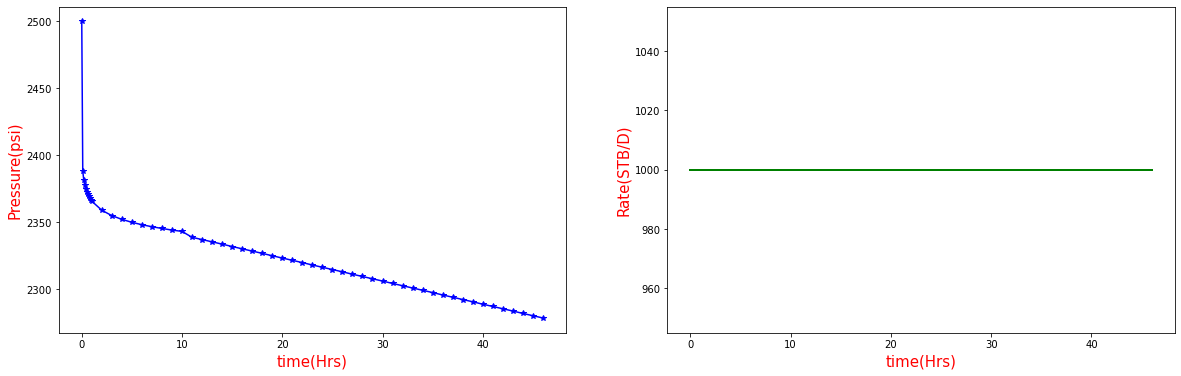

In [9]:
fig,ax = plt.subplots(1,2,figsize = (20,6))
ax[0].plot(Test1['t'],Test1['p'],marker='*',color='blue')
ax[1].plot([list(Test1['t'])[0],list(Test1['t'])[-1]],[q1,q1],color='green',linestyle = 'solid',lw=2)
ax[0].set_xlabel('time(Hrs)',color='red',size=15)
ax[0].set_ylabel('Pressure(psi)',color='red',size=15)
ax[1].set_xlabel('time(Hrs)',color='red',size=15)
ax[1].set_ylabel('Rate(STB/D)',color='red',size=15)


Text(0, 0.5, 'Rate(STB/D)')

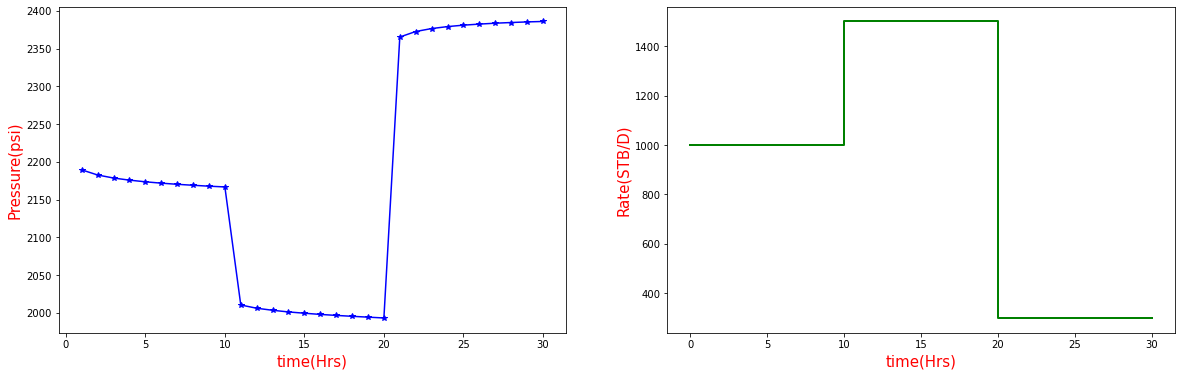

In [10]:
q2 = [1000,1000,1500,1500,300,300]
t2 = [0,10,10,20,20,30]

fig,ax = plt.subplots(1,2,figsize = (20,6))
ax[0].plot(Test2['t'],Test2['p'],marker='*',color='blue')
ax[1].plot(t2,q2,color='green',linestyle = 'solid',lw=2)
ax[0].set_xlabel('time(Hrs)',color='red',size=15)
ax[0].set_ylabel('Pressure(psi)',color='red',size=15)
ax[1].set_xlabel('time(Hrs)',color='red',size=15)
ax[1].set_ylabel('Rate(STB/D)',color='red',size=15)

Text(0, 0.5, 'Rate(STB/D)')

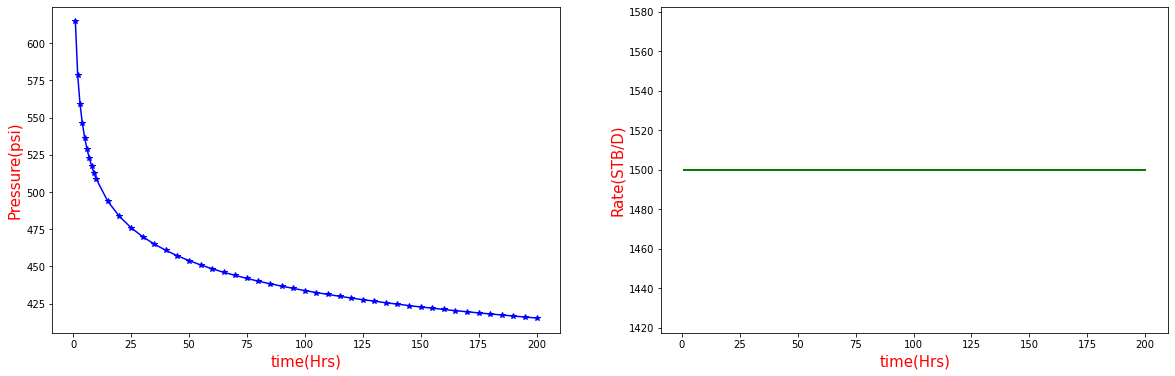

In [11]:
p1 = 1500  # psi

fig,ax = plt.subplots(1,2,figsize = (20,6))
ax[0].plot(Test3['t'],Test3['q'],marker='*',color='blue')
ax[1].plot([list(Test3['t'])[0],list(Test3['t'])[-1]],[p1,p1],color='green',linestyle = 'solid',lw=2)
ax[0].set_xlabel('time(Hrs)',color='red',size=15)
ax[0].set_ylabel('Pressure(psi)',color='red',size=15)
ax[1].set_xlabel('time(Hrs)',color='red',size=15)
ax[1].set_ylabel('Rate(STB/D)',color='red',size=15)

(0.0, 46.0)

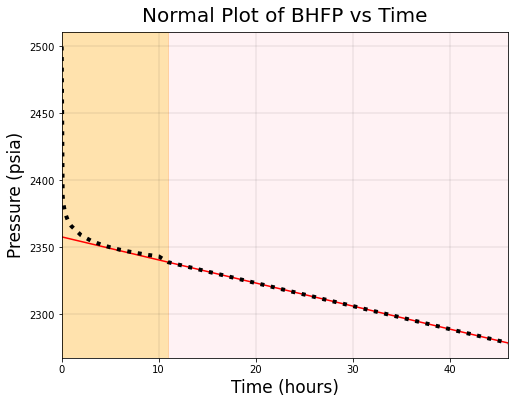

In [12]:
your_guess=20
def linear(x, a, b):
    return a * x + b
t_crop1, p_crop1 = Test1['t'][your_guess:], Test1['p'][your_guess:]
popt, pcov = curve_fit(linear, t_crop1, p_crop1)
m1, c1 = popt[0], popt[1]
y_line = c1 + m1*Test1['t']
fig1,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(Test1['t'],y_line,color='red')
ax.plot(Test1['t'],Test1['p'],linestyle='dotted',color='black',lw=4)
ax.axvspan(0, Test1['t'][your_guess], color='orange', alpha=0.32)
ax.axvspan(Test1['t'][your_guess], max(Test1['t']), color='pink', alpha=0.2)
ax.grid(True, which='both', color='black', linewidth=0.1)
ax.set_title('Normal Plot of BHFP vs Time', size=20, pad=10)
ax.set_xlabel('Time (hours)', size=17)
ax.set_ylabel('Pressure (psia)', size=17)
ax.set_xlim(0,max(Test1['t']))

(0.07359733836147038, 46.0)

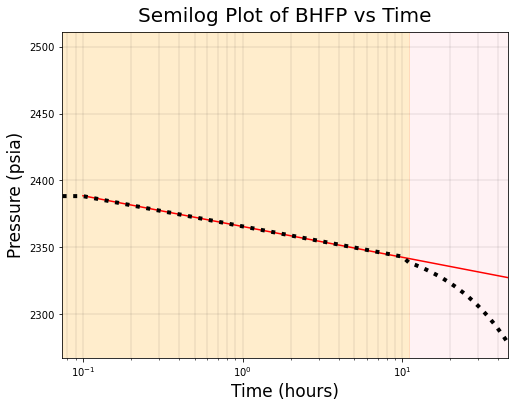

In [13]:
your_guess=20
def linear(x, a, b):
    return a * x + b
t_crop2, p_crop2 = np.log(Test1['t'][1:your_guess+1]), Test1['p'][1:your_guess+1]
popt, pcov = curve_fit(linear, t_crop2, p_crop2)
m2, c2 = popt[0], popt[1]
y_line = c2 + m2*np.log(Test1['t'])
fig2,ax = plt.subplots(1,1,figsize=(8,6))
ax.semilogx(Test1['t'],y_line,color='red')
ax.plot(Test1['t'],Test1['p'],linestyle='dotted',color='black',lw=4)
ax.axvspan(0, Test1['t'][your_guess], color='orange', alpha=0.2)
ax.axvspan(Test1['t'][your_guess], max(Test1['t']), color='pink', alpha=0.2)
ax.grid(True, which='both', color='black', linewidth=0.1)
ax.set_title('Semilog Plot of BHFP vs Time', size=20, pad=10)
ax.set_xlabel('Time (hours)', size=17)
ax.set_ylabel('Pressure (psia)', size=17)
ax.set_xlim(xmax=max(Test1['t']))

In [14]:
print('m1:',m1,'c1:',c1)
print('m2:',m2,'c2:',c2)

m1: -1.7238996139056044 c1: 2357.689472334615
m2: -9.982228434905515 c2: 2365.601921392215


In [15]:
# known 
poro = 0.15 # Porosity
rw = 0.333 # Wellbore radius, ft
h = 32 # Reservoir thickness, ft
ct = 12E-6 # Total compressibility, sip
pi = 2500 # Initial reservoir pressure, psia
mu_oil = 2 # Oil viscosity, cp
Bo = 1.333 # Oil FVF, RB/STB


m_cycle=m2*np.log(10)

In [16]:
def permeability(q1,Bo,mu_oil,h,m_cycle):
    return (-162.6 * q1 * Bo * mu_oil) / (m_cycle * h)
    

In [17]:
k = permeability(q1,Bo,mu_oil,h,m_cycle)
print('k =',k)

k = 589.3693072239636


In [18]:
def skin_factor(pi,k,poro,mu_oil,ct,rw,c2,m_cycle):
    return 1.1513 * (((pi - c2) / -m_cycle) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)

In [19]:
s = skin_factor(pi, k, poro, mu_oil, ct, rw, c2, m_cycle)
print('s=',s)

s= -0.10876414017957721


In [20]:
def reservoir_size(q1, Bo, poro, h, ct, m1):
    return np.sqrt(-(.07447 * q1 * Bo) / (poro * h * ct * m1))

In [21]:
re = reservoir_size(q1, Bo, poro, h, ct, m1)

## Multi rate Well Test

In [22]:
Test2.head()

,t,p
0,1,2189.3
1,2,2182.5
2,3,2178.5
3,4,2175.7
4,5,2173.5


In [30]:
t2 = [0, 10,10, 20,20, 30]
q2 = [1000,1000,1500,1500,300,300]

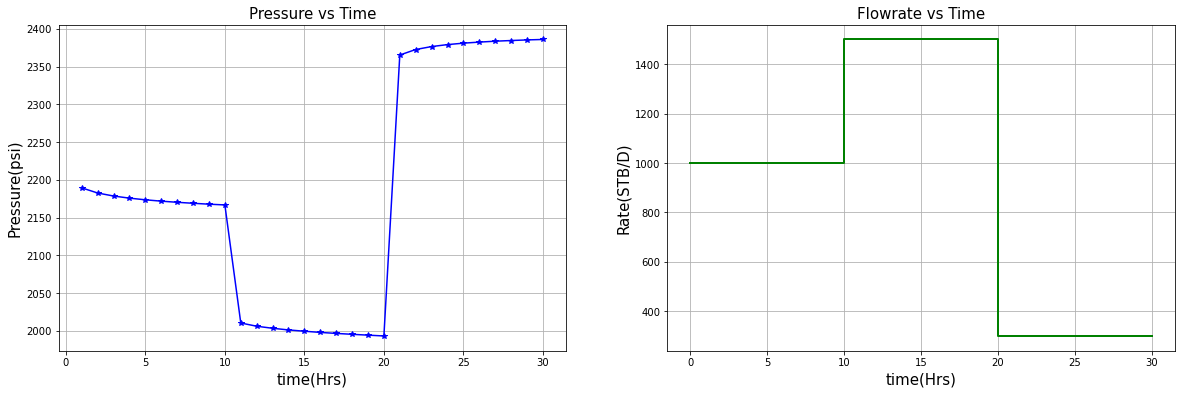

In [36]:
fig,ax = plt.subplots(1,2,figsize = (20,6))
ax[0].plot(Test2['t'],Test2['p'],marker='*',color='blue')
ax[1].plot(t2,q2,color='green',linestyle = 'solid',lw=2)
ax[0].set_xlabel('time(Hrs)',color='black',size=15)
ax[0].set_ylabel('Pressure(psi)',color='black',size=15)
ax[1].set_xlabel('time(Hrs)',color='black',size=15)
ax[1].set_ylabel('Rate(STB/D)',color='black',size=15)
ax[0].set_title('Pressure vs Time',size=15)
ax[1].set_title('Flowrate vs Time',size=15)
ax[0].grid()
ax[1].grid()

In [37]:
t_change = np.array([10,20,30])
q_change = np.array([1000,1500,300])

In [39]:
t_change = np.append(0,t_change)

In [40]:
t_change

array([ 0, 10, 20, 30])

In [43]:
delta_q = [j-1 for i,j in zip(q_change[:1],q_change[1:])]


In [46]:
delta_q = np.concatenate((np.array([0,q_change[0]]), delta_q))

In [55]:
t = Test2['t'].values
p = Test2['p'].values

In [62]:
time_arr = []
rate_arr = []
x = []
y = []
t = Test2['t'].values
p = Test2['p'].values

# define rate-time steps
t_change = np.array([10, 20, 30])
q_change = np.array([1000, 1500, 300])

In [63]:
def multi_rate_drawdown_test(t, p, t_change, q_change, Bo, mu_oil, h, poro, ct, rw, pi):
  """
  Analyzing Multi-Rate Well-test Result
  """
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.optimize import curve_fit
  import matplotlib.patches as mpl_patches  

  def permeability(Bo, mu_oil, h, m):
    """Calculate permeability from drawdown plot"""
    return (162.6 * Bo * mu_oil) / (m * h)

  def skin_factor(k, poro, mu_oil, ct, rw, c, m):
    """
    Calculate skin factor from drawdown plot
    Note: k is the calculated permeability
    """
    return 1.1513 * ((c / m) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)

  def linear(x, a, b):
    return a * x + b
  
  # calculate delta rate (Δq)
  t_change = np.append(0, t_change)
  delta_q = [j-i for i, j in zip(q_change[:-1], q_change[1:])]
  delta_q = np.concatenate((np.array([0, q_change[0]]), delta_q))

  # create rate step profile
  time_arr = []
  rate_arr = []
  x = []
  y = []

  " Calculate the x-axis and y-axis "

  for i in range(len(t)):  
      for j in range(0, len(t_change)-1):
          if t[i] > t_change[j] and t[i] <= t_change[j+1]:
              # produce t and q profile
              time_arr.append(t[i])
              rate_arr.append(q_change[j])

              # calculate Fp as x-axis
              tn = np.log10(t[i] - t_change[:j+1])
              delta_qn = delta_q[1:j+2] / q_change[j]
              tn_mult_delta_qn = tn * delta_qn
              Fp = np.sum(tn_mult_delta_qn)
              x.append(Fp)

              # calculate ((pi - pwf) / qn) as y-axis
              y_ = (pi - p[i]) / q_change[j]
              y.append(y_)

  # regression to the drawdown plot
  popt, pcov = curve_fit(linear, x, y)
  m, c = popt[0], popt[1]

  # calculate permeability
  k = permeability(Bo, mu_oil, h, m)

  # calculate skin factor
  s = skin_factor(k, poro, mu_oil, ct, rw, c, m)

  # output calculated results to plot
  labels1 = []
  labels1.append("Calc. Permeability = {} md".format(np.round(k, 3)))
  labels1.append("Calc. Skin Factor = {}".format(np.round(s, 3)))
  handles1 = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                  lw=0, alpha=0)] * 2

  " Plot Analysis "

  plt.figure(figsize=(15,5))

  plt.subplot(1,2,1)
  plt.plot(time_arr, p, '.-', color='black')
  plt.xlim(0, max(t))
  plt.title('Pressure Profile from Well-Test Result', size=20, pad=10)
  plt.xlabel(r'Time (hours)', size=17); plt.ylabel(r'Pressure (psi)', size=17)
  plt.grid(True, which='both', color='black', linewidth=0.1)

  plt.subplot(1,2,2)
  plt.plot(x, y, '.', color='black')
  plt.xlim(0, max(x))
  plt.title('Drawdown Plot for Multi-Rate Flow', size=20, pad=10)
  plt.xlabel(r'$F_p$', size=17); plt.ylabel(r'$\frac{p_i-p_{wf}}{q_n}$ (psi-D/STB)', size=17)

  # plot regression line
  y_fit = m * np.array(x) + c
  plt.plot(x, y_fit, color='red', linewidth=0.5)

  plt.legend(handles1, labels1, loc='best', fontsize='large', 
              fancybox=True, framealpha=0.7, 
              handlelength=0, handletextpad=0) 
  plt.grid(True, which='both', color='black', linewidth=0.1)
  plt.tight_layout(1)
  plt.show()

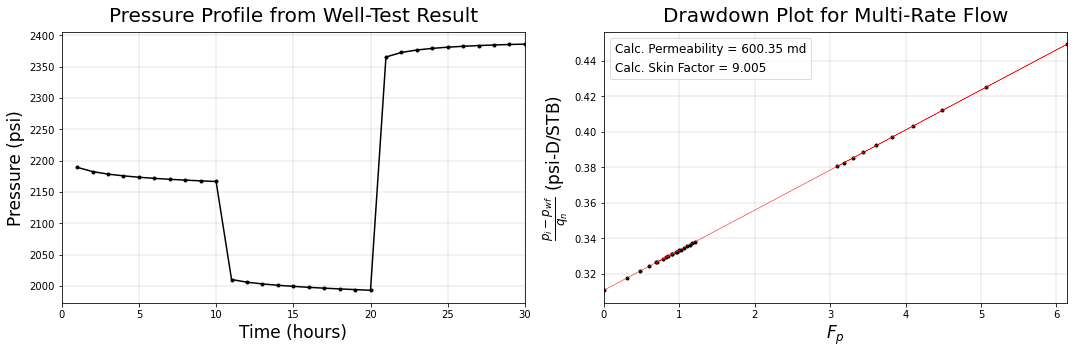

In [64]:
multi_rate_drawdown_test(t, p, t_change, q_change, Bo, mu_oil, h, poro, ct, rw, pi)


In [65]:
def constant_pressure_test(t, q, pwf, pi, Bo, mu_oil, h, poro, ct, rw):
  """
  Analyzing Constant Pressure Well-test Result
  """
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.optimize import curve_fit
  import matplotlib.patches as mpl_patches  

  def permeability(Bo, mu_oil, h, m):
    """Calculate permeability from semilog plot"""
    return (162.6 * Bo * mu_oil) / (m * h * (pi - pwf))

  def skin_factor(k, poro, mu_oil, ct, rw, c, m):
    """
    Calculate skin factor from semilog plot
    Note: k is the calculated permeability
    """
    return 1.1513 * ((c / m) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275)

  def linear(x, a, b):
    return a * x + b
  
  # linear regression
  x, y = np.log10(t), 1/q
  popt, pcov = curve_fit(linear, x, y)
  m, c = popt[0], popt[1]

  plt.figure(figsize=(15,5))

  # calculate permeability
  k = permeability(Bo, mu_oil, h, m)

  # calculate skin factor
  s = skin_factor(k, poro, mu_oil, ct, rw, c, m)

  # output calculated results to plot
  labels1 = []
  labels1.append("Calc. Permeability = {} md".format(np.round(k, 3)))
  labels1.append("Calc. Skin Factor = {}".format(np.round(s, 3)))
  handles1 = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                  lw=0, alpha=0)] * 2

  # normal plot of q vs t
  plt.subplot(1,2,1)
  plt.plot(t, q, '.', color='black')
  plt.title('Normal Plot of Rate vs Time', size=20, pad=10)
  plt.xlabel('Time (hour)', size=17); plt.ylabel(r'Rate (STB/D)', size=17)  
  plt.xlim(0, max(t))

  plt.grid(True, which='both', color='black', linewidth=0.1)

  # plot semilog plot of 1/q vs t
  plt.subplot(1,2,2)
  plt.semilogx(t, 1/q, '.', color='black')
  plt.title('Semilog Plot of Reciprocal Rate vs Time', size=20, pad=10)
  plt.xlabel('Time (hour)', size=17); plt.ylabel(r'$\frac{1}{q}$ (D/STB)', size=17)
  plt.xlim(xmin=1)

  # plot regression line
  y_fit = m * np.log10(t) + c
  plt.plot(t, y_fit, color='red', linewidth=0.7)

  plt.legend(handles1, labels1, loc='best', fontsize='large', 
              fancybox=True, framealpha=0.7, 
              handlelength=0, handletextpad=0) 

  plt.grid(True, which='both', color='black', linewidth=0.1)

  plt.tight_layout(1)
  plt.show()  

  


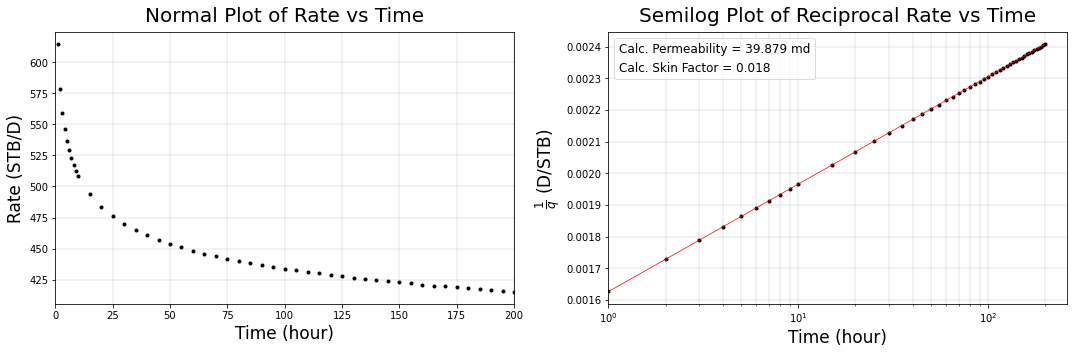

In [66]:
t = Test3['t'].values
q = Test3['q'].values

# define flowing pressure
pwf = 1500 # Wellbore Flowing Pressure, psia

# well-test analysis
constant_pressure_test(t, q, pwf, pi, Bo, mu_oil, h, poro, ct, rw)

In [67]:
def constant_rate_buildup_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, t_since_shutin, your_guess=5):
  """
  Analyzing Constant Rate Buildup Well-test Result
  """
  import numpy as np
  import matplotlib.pyplot as plt
  from scipy.optimize import curve_fit
  import matplotlib.patches as mpl_patches  

  def permeability(q, Bo, mu_oil, h, m):
    """Calculate permeability from Horner plot"""
    return -(162.6 * q * Bo * mu_oil) / (m * h)

  def skin_factor(t_since_shutin, pwf, k, poro, mu_oil, ct, rw, m, pi):
    """
    Calculate skin factor from Horner plot
    Note: k and pi is the calculated permeability and initial pressure
    """
    b = pi + m1 * np.log10(t_since_shutin + 1)
    return 1.1513 * (((pwf - b) / m1) - np.log10(k / (poro * mu_oil * ct * (rw**2))) + 3.2275) 

  def linear(x, a, b):
    return a * x + b
  
  # Horner plotting parameters
  delta_t = t - t[0]
  x = (t_since_shutin + delta_t) / delta_t

  " Analysis of Straight Line of Wellbore Storage Effect "

  x_crop1, y_crop1 = np.log10(x[-your_guess:]), p[-your_guess:]
  popt, pcov = curve_fit(linear, x_crop1, y_crop1)
  m1, c1 = popt[0], popt[1]

  # calculate permeability
  k = permeability(q, Bo, mu_oil, h, m1)

  # calculate initial reservoir pressure
  pi = c1

  # calculate skin factor
  pwf = p[0]
  s = skin_factor(t_since_shutin, pwf, k, poro, mu_oil, ct, rw, m1, pi)

  # Horner buildup plot
  plt.figure(figsize=(18,6))

  plt.subplot(1,2,1)
  plt.plot(t, p, '.', color='black')
  plt.title('Normal Plot of BHFP vs Time', size=20, pad=10)
  plt.xlabel('Time since shut-in (hours)', size=17); plt.ylabel('Pressure (psia)', size=17)
  plt.xlim(0,max(t))

  ## plot the separate WTR and ETR region
  plt.axvspan(0, t[your_guess], color='blue', alpha=0.2)
  plt.axvspan(t[your_guess], max(t), color='green', alpha=0.3)

  labels2 = []
  labels2.append("Time @ shut-in = {} hours".format(np.round(t_since_shutin, 1)))  
  labels2.append("End of ETR Time = {} hours".format(np.round(t[your_guess], 3)))
  handles2 = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                  lw=0, alpha=0)] * 2

  plt.legend(handles2, labels2, loc='center right', fontsize='large', 
              fancybox=True, framealpha=0.7, 
              handlelength=0, handletextpad=0) 
  plt.grid(True, which='both', color='black', linewidth=0.1)                                

  plt.subplot(1,2,2)
  plt.semilogx(x, p, '.', color='black')
  plt.title('Semilog Plot of BHFP vs Horner Time', size=20, pad=10)
  plt.xlabel(r'Horner time $(\frac{t_p+ \Delta t}{\Delta t})$', size=17) 
  plt.ylabel(r'$p_{wf}$ (psia)', size=17)
  plt.xlim(xmin=1)

  ## plot the separate WTR and ETR region
  plt.axvspan(0, x[-your_guess], color='green', alpha=0.3)
  plt.axvspan(x[-your_guess], 1E+25, color='blue', alpha=0.2)

  # output calculated results to plot
  labels1 = []
  labels1.append("Calc. Permeability = {} md".format(np.round(k, 3)))
  labels1.append("Calc. Initial Pressure = {} psia".format(np.round(pi, 3)))
  labels1.append("Calc. Skin Factor = {}".format(np.round(s, 3)))
  handles1 = [mpl_patches.Rectangle((0, 0), 1, 1, fc="white", ec="white", 
                                  lw=0, alpha=0)] * 3

  # plot regression line
  y_fit = m1 * np.log10(x) + c1
  plt.plot(x, y_fit, color='red', linewidth=0.8)

  # plt.gca().invert_xaxis()
  # plt.gca().yaxis.tick_right()
  # plt.gca().yaxis.set_label_position("right")

  plt.legend(handles1, labels1, loc='best', fontsize='large', 
              fancybox=True, framealpha=0.7, 
              handlelength=0, handletextpad=0) 

  plt.grid(True, which='both', color='black', linewidth=0.1)
  plt.show()

In [68]:
constant_rate_buildup_test(t, p, q, Bo, mu_oil, h, poro, ct, rw, t_since_shutin, your_guess=5)


NameError: name 't_since_shutin' is not defined